In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import librosa.display

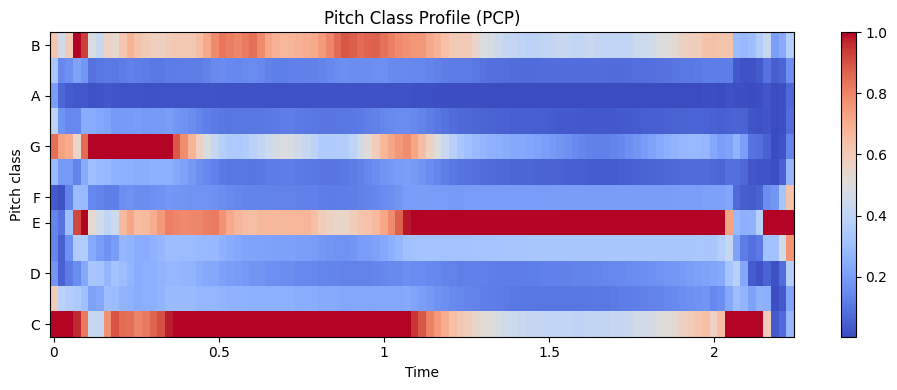

In [ ]:
# Load the audio file
audio_path = '/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/Major/Major_0.wav'
y, sr = librosa.load(audio_path)

# Compute the PCP
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Display the PCP as a heatmap
plt.figure(figsize=(10, 4))
plt.title('Pitch Class Profile (PCP)')
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
def extract_features(audio_path):
    y, sr = librosa.load(audio_path)

    # Calculate PCP
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    pcp = np.mean(chroma, axis=1)  # Average over time frames

    # Calculate Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

    # Calculate Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    # Calculate MFCCs (we'll use the first 5 coefficients as an example)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=5)
    mfcc_means = np.mean(mfcc, axis=1)  # Average each MFCC over time

    # Combine all features into a single array
    features = np.hstack([pcp, spectral_centroid, spectral_bandwidth, mfcc_means])
    return features

# Load your data
major_folder = '/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/Major/'
minor_folder = '/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/Minor/'

# Get all .wav files in each folder
major_files = glob.glob(os.path.join(major_folder, '*.wav'))
minor_files = glob.glob(os.path.join(minor_folder, '*.wav'))

data = []
for file_path in major_files:
    features = extract_features(file_path)
    data.append([os.path.basename(file_path), 'Major'] + list(features))
# Process Minor files
for file_path in minor_files:
    features = extract_features(file_path)
    data.append([os.path.basename(file_path), 'Minor'] + list(features))

# Create a DataFrame
columns = ['file_name', 'label'] + [f'PCP_{i}' for i in range(12)] + ['Spectral_Centroid', 'Spectral_Bandwidth'] + [f'MFCC_{i+1}' for i in range(5)]
df = pd.DataFrame(data, columns=columns)

# Display the first few rows of the DataFrame
df.head()

,file_name,label,PCP_0,PCP_1,PCP_2,PCP_3,PCP_4,PCP_5,PCP_6,PCP_7,...,PCP_9,PCP_10,PCP_11,Spectral_Centroid,Spectral_Bandwidth,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5
0,Major_0.wav,Major,0.742913,0.204407,0.173953,0.280547,0.802854,0.172853,0.121578,0.434359,...,0.015909,0.114468,0.593574,660.890498,694.101241,-294.416565,226.835510,-0.738271,-4.539337,6.162291
1,Major_100.wav,Major,0.223433,0.931608,0.578779,0.638870,0.234647,0.322008,0.154993,0.370598,...,0.110103,0.271105,0.075028,694.080893,681.164619,-295.360046,236.364960,-17.859705,-11.506394,-5.061722
2,Major_101.wav,Major,0.135801,0.345959,0.287088,0.444748,0.292843,0.478288,0.327136,0.586877,...,0.082539,0.161681,0.070314,618.949693,889.152124,-360.892609,172.485123,32.947308,-5.843576,1.444249
3,Major_102.wav,Major,0.305063,0.900950,0.557774,0.618877,0.212661,0.281733,0.140062,0.353198,...,0.108262,0.369070,0.588335,742.074938,720.884869,-278.589478,239.529938,-27.829748,-13.941564,-5.264627
4,Major_103.wav,Major,0.183574,0.322636,0.266323,0.411799,0.261950,0.391943,0.283660,0.554242,...,0.071562,0.225610,0.418335,652.608220,940.971469,-349.830048,174.071518,36.479820,-4.713696,1.619659


In [ ]:
#models

# importing packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df["label"] = df["label"].replace("Major", 1)
df["label"] = df["label"].replace("Minor", 0)

columns = [f'PCP_{i}' for i in range(12)] + ['Spectral_Centroid', 'Spectral_Bandwidth'] + [f'MFCC_{i+1}' for i in range(5)]

train_X, val_X, train_y, val_y = train_test_split(df[columns], df["label"], test_size=0.30, random_state=0, stratify=df["label"])

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
val_X = scaler.transform(val_X)

train_X = pd.DataFrame(train_X, columns=columns)
val_X = pd.DataFrame(val_X, columns=columns)

train_X.head()

<ipython-input-6-ce42b7ac9022>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace("Minor", 0)


,PCP_0,PCP_1,PCP_2,PCP_3,PCP_4,PCP_5,PCP_6,PCP_7,PCP_8,PCP_9,PCP_10,PCP_11,Spectral_Centroid,Spectral_Bandwidth,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5
0,-0.898032,0.014513,-0.662512,-1.297886,-0.805601,0.434291,0.007565,1.555718,0.043000,-0.662120,0.309472,-0.970162,-0.913862,0.864178,-1.062644,-1.282494,0.851087,0.081628,-0.344203
1,-0.459263,1.508582,-0.260371,-0.446371,1.254318,-0.302301,-0.883327,-0.184280,0.502712,0.001871,2.215186,0.813797,-0.449462,-1.686543,0.683510,1.368119,-0.054106,1.500924,0.768486
2,-0.469263,2.630135,1.529375,1.489429,-0.391397,0.062638,-0.748205,0.510573,0.548118,-0.838250,-0.359292,-1.126845,0.828862,-1.006203,0.799023,1.073744,-1.339891,-1.247595,-1.535563
3,-0.279088,-1.095288,-0.934096,-1.239387,-0.983233,0.000089,-0.120237,0.204813,-0.629379,-1.057414,-0.414212,1.717716,-1.034616,0.644766,-0.525745,-1.003036,1.013008,0.775900,0.285659
4,0.328637,-0.356911,-0.131175,-0.412507,1.187902,1.353428,-0.464899,-1.164661,-1.223807,-0.857745,-1.242017,-0.949364,-1.632075,-0.429005,-1.665708,-1.706875,1.055406,0.093521,-1.101863


In [ ]:
df['label'].value_counts()

,count
label,
1,502
0,357


In [ ]:
lr = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
svc = SVC(random_state=0)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

score_lr = cross_val_score(lr, train_X, train_y, cv=10).mean()
score_knn = cross_val_score(knn, train_X, train_y, cv=10).mean()
score_svc = cross_val_score(svc, train_X, train_y, cv=10).mean()
score_gnb = cross_val_score(gnb, train_X, train_y, cv=10).mean()
score_dtc = cross_val_score(dtc, train_X, train_y, cv=10).mean()
score_rfc = cross_val_score(rfc, train_X, train_y, cv=10).mean()

In [ ]:
print("Cross Val Score for Logistic Regression: {:.2f}".format(score_lr))
print("Cross Val Score for KNeighbors Classifier: {:.2f}".format(score_knn))
print("Cross Val Score for SVC: {:.2f}".format(score_svc))
print("Cross Val Score for Gaussian NB: {:.2f}".format(score_gnb))
print("Cross Val Score for Decision Tree Classifier: {:.2f}".format(score_dtc))
print("Cross Val Score for Random Forest Classifier: {:.2f}".format(score_rfc))

Cross Val Score for Logistic Regression: 0.58
Cross Val Score for KNeighbors Classifier: 0.61
Cross Val Score for SVC: 0.62
Cross Val Score for Gaussian NB: 0.56
Cross Val Score for Decision Tree Classifier: 0.69
Cross Val Score for Random Forest Classifier: 0.73


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
KNN Accuracy: 0.7441860465116279
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.64      0.67       107
           1       0.76      0.82      0.79       151

    accuracy                           0.74       258
   macro avg       0.74      0.73      0.73       258
weighted avg       0.74      0.74      0.74       258

KNN Confusion Matrix:
 [[ 68  39]
 [ 27 124]]


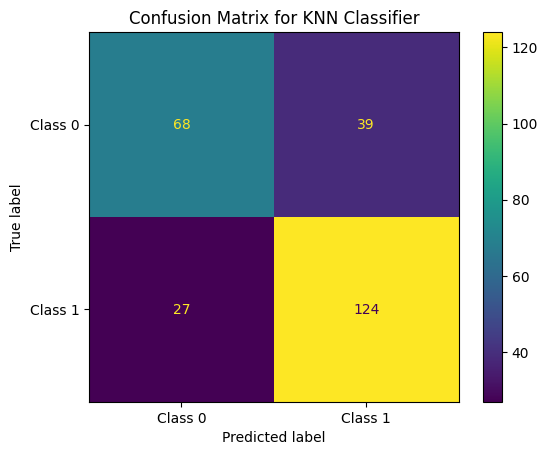

In [ ]:
# Define parameter grid for KNN
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV for KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10, scoring='accuracy')
grid_knn.fit(train_X, train_y)

# Best parameters and model evaluation
best_knn = grid_knn.best_estimator_
print("Best Parameters for KNN:", grid_knn.best_params_)

# Train and evaluate on the test set
knn_pred = best_knn.predict(val_X)
cm = confusion_matrix(val_y, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

print("KNN Accuracy:", accuracy_score(val_y, knn_pred))
print("KNN Classification Report:\n", classification_report(val_y, knn_pred))
print("KNN Confusion Matrix:\n", cm)

disp.plot()
plt.title('Confusion Matrix for KNN Classifier')
plt.show()